 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [37]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [38]:
# Reading whale returns
whale_df = pd.read_csv('./DATA/whale_returns.csv', parse_dates=True, infer_datetime_format=True, index_col='Date')
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [39]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [40]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [41]:
# Reading algorithmic returns
algo_df = pd.read_csv('./DATA/algo_returns.csv', parse_dates=True, infer_datetime_format=True, index_col='Date')
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [42]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [43]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [44]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv('./DATA/sp500_history.csv', parse_dates=True, infer_datetime_format=True, index_col='Date')
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [45]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [46]:
# Create Cleaning Function
def clean_close(close):
    close = close.replace('$','')
    close = close.replace(',','')
    return float(close)

In [47]:
# Fix Data Types
sp500_df = pd.DataFrame(sp500_df['Close'].apply(clean_close))
print(sp500_df.dtypes)
sp500_df.head()

Close    float64
dtype: object


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [48]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [49]:
# Count nulls
sp500_df.isnull().sum()

Close    1
dtype: int64

In [50]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [51]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.rename(columns={'Close': 'SP500'},inplace=True)
sp500_df.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [52]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df,algo_df,sp500_df],axis=1,join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

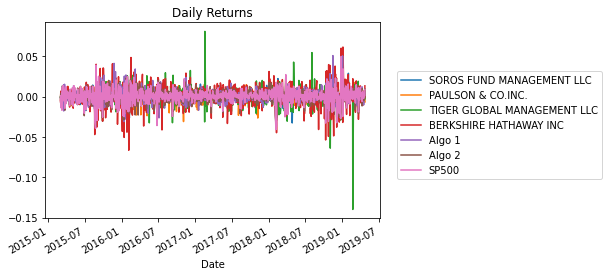

In [53]:
# Plot daily returns of all portfolios
combined_df.plot()
plt.legend(loc=[1.05,0.2])
plt.title('Daily Returns');

#### Calculate and Plot cumulative returns.

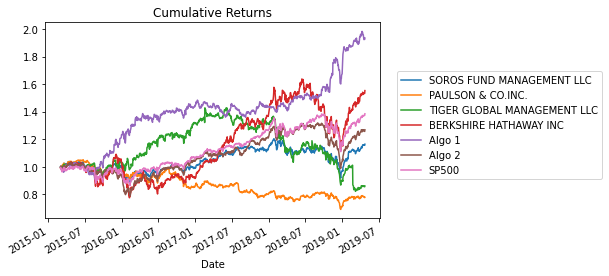

In [54]:
# Calculate cumulative returns of all portfolios
(1+combined_df).cumprod()
# Plot cumulative returns
(1+combined_df).cumprod().plot()
plt.legend(loc=[1.05,0.2])
plt.title('Cumulative Returns');

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


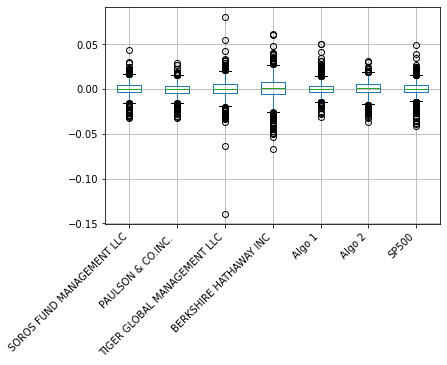

In [55]:
# Box plot to visually show risk
combined_df.boxplot()
plt.xticks(rotation=45,ha='right');

### Calculate Standard Deviations

In [56]:
# Calculate the daily standard deviations of all portfolios
rolling_dev = combined_df.rolling(window=2).std().dropna()
rolling_dev.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.001263,0.000590,0.003457,0.001777,0.005398,0.001348,0.003949
2015-03-06,0.008430,0.005409,0.007662,0.014018,0.002830,0.011161,0.010868
2015-03-09,0.006002,0.005515,0.010129,0.008093,0.000347,0.009025,0.012812
2015-03-10,0.007669,0.006764,0.012673,0.005718,0.002868,0.009517,0.014783


### Calculate the Annualized Standard Deviation

In [57]:
# Calculate the annualized standard deviation (252 trading days)
combined_df.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

### Determine which portfolios are riskier than the S&P 500

**Determine which portfolios are riskier than the S&P 500**

Whichever portfolios that had a higher annual STD than the SP500 are riskier than the Market. That includes Tiger Global and Berkshire Hathaway

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

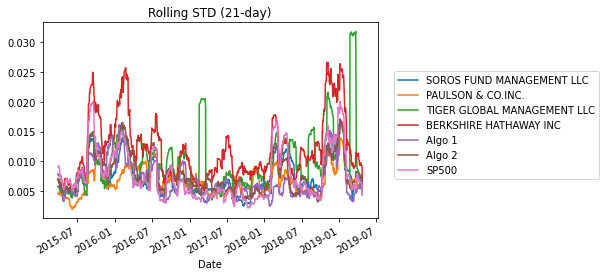

In [58]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
combined_df.rolling(window=21).std().dropna().plot()
plt.legend(loc=[1.05,0.2])
plt.title('Rolling STD (21-day)');

### Calculate and plot the correlation

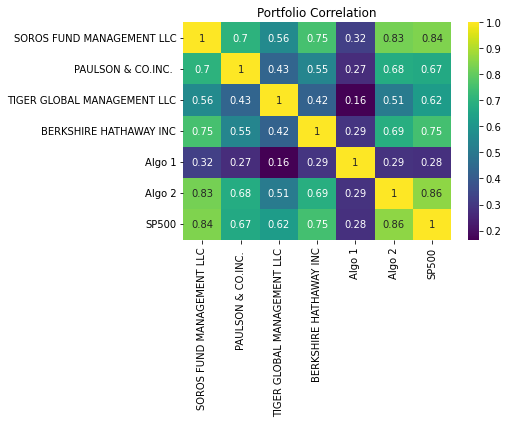

In [59]:
# Calculate the correlation
# Display the correlation matrix
sns.heatmap(combined_df.corr(),cmap='viridis',annot=True)
plt.title('Portfolio Correlation');

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Algo 1 Beta is: 0.249


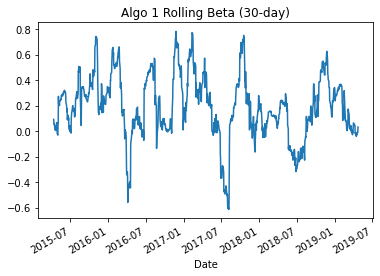

In [60]:
# Calculate covariance of a single portfolio
algo1_covar = combined_df['Algo 1'].cov(combined_df['SP500'])

# Calculate variance of S&P 500
sp500_var = combined_df['SP500'].var()

# Computing beta
algo1_beta = round(algo1_covar/sp500_var, 3)
print(f'Algo 1 Beta is: {algo1_beta}')

# Plot beta trend
(combined_df['Algo 1'].rolling(window=30).cov(combined_df['SP500'])/combined_df['SP500'].rolling(window=30).var()).plot()
plt.title('Algo 1 Rolling Beta (30-day)');

In [61]:
sp500_var

7.316632424648712e-05

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

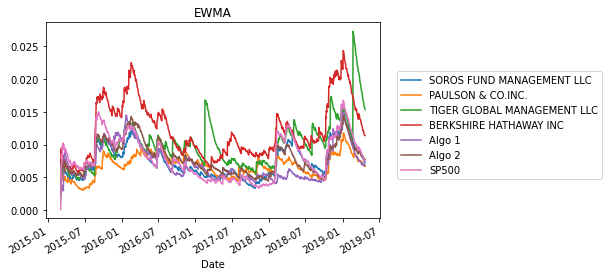

In [62]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot()
plt.legend(loc=[1.05,0.2])
plt.title('EWMA');

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [63]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean()*252) / (combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

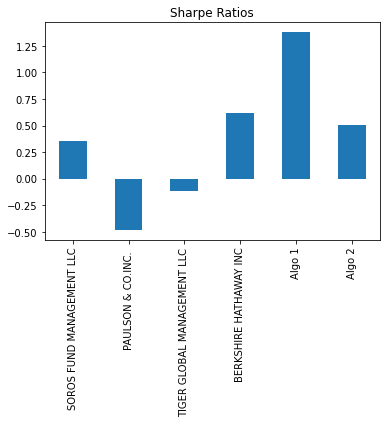

In [64]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.drop('SP500').plot(kind='bar')
plt.title('Sharpe Ratios');

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

When the Sharpe ratio is negative, it means that the investment return for the portfolio is lower than that of the risk free rate. Algo 1 has a Sharpe ratio which is significantly more positive than all of the whale portfolios and shows that it performed better than the market and as well as the whales. Algo 2's performance was more mixed as it was less negative than only three of the whale's portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [65]:
# Reading data from 1st stock
amzn_df = pd.read_csv('./DATA/amzn_historical.csv', parse_dates=True, infer_datetime_format=True, index_col='Date')
amzn_df.sort_index(inplace=True)
amzn_df.rename(columns={'Close':'AMZN'}, inplace=True)
amzn_df.head()

,AMZN
Date,
2012-01-03 16:00:00,8.95
2012-01-04 16:00:00,8.88
2012-01-05 16:00:00,8.88
2012-01-06 16:00:00,9.13
2012-01-09 16:00:00,8.93


In [66]:
# Reading data from 2nd stock
ba_df = pd.read_csv('./DATA/ba_historical.csv', parse_dates=True, infer_datetime_format=True, index_col='Date')
ba_df.sort_index(inplace=True)
ba_df.rename(columns={'Close':'BA'}, inplace=True)
ba_df.head()

,BA
Date,
2012-01-03 16:00:00,74.22
2012-01-04 16:00:00,74.33
2012-01-05 16:00:00,73.53
2012-01-06 16:00:00,73.98
2012-01-09 16:00:00,74.53


In [67]:
# Reading data from 3rd stock
xom_df = pd.read_csv('./DATA/xom_historical.csv', parse_dates=True, infer_datetime_format=True, index_col='Date')
xom_df.sort_index(inplace=True)
xom_df.rename(columns={'Close':'XOM'}, inplace=True)
xom_df.head()

,XOM
Date,
2012-01-03 16:00:00,86.00
2012-01-04 16:00:00,86.02
2012-01-05 16:00:00,85.76
2012-01-06 16:00:00,85.12
2012-01-09 16:00:00,85.50


In [68]:
# Combine all stocks in a single DataFrame
custom_df = pd.concat([amzn_df,ba_df,xom_df], axis=1, join='inner')
custom_df.head()

,AMZN,BA,XOM
Date,,,
2012-01-03 16:00:00,8.95,74.22,86.00
2012-01-04 16:00:00,8.88,74.33,86.02
2012-01-05 16:00:00,8.88,73.53,85.76
2012-01-06 16:00:00,9.13,73.98,85.12
2012-01-09 16:00:00,8.93,74.53,85.50


In [69]:
# Reset Date index
custom_df.set_index(pd.to_datetime(custom_df.index.date), inplace=True)
custom_df.index.name = 'Date'

In [70]:
# Calculate daily returns
custom_df = custom_df.pct_change()
# Drop NAs
custom_df.dropna(inplace=True)
# Display sample data
custom_df.head()

,AMZN,BA,XOM
Date,,,
2012-01-04,-0.007821,0.001482,0.000233
2012-01-05,0.000000,-0.010763,-0.003023
2012-01-06,0.028153,0.006120,-0.007463
2012-01-09,-0.021906,0.007434,0.004464
2012-01-10,0.004479,0.006306,0.002573


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [71]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_returns = pd.DataFrame({'MY PORTFOLIO': custom_df.dot(weights)})

# Display sample data
my_returns.head()

,MY PORTFOLIO
Date,
2012-01-04,-0.002036
2012-01-05,-0.004595
2012-01-06,0.008937
2012-01-09,-0.003336
2012-01-10,0.004453


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [72]:
# Join your returns DataFrame to the original returns DataFrame
final_df = pd.concat([my_returns,combined_df],axis=1,join='inner')
final_df.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2015-03-03,0.001382,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,-0.005848,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.002931,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.013883,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000491,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [73]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_df.isnull().sum()

MY PORTFOLIO                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [74]:
# Calculate the annualized `std`
final_df.std()*np.sqrt(252)

MY PORTFOLIO                   0.187763
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

### Calculate and plot rolling `std` with 21-day window

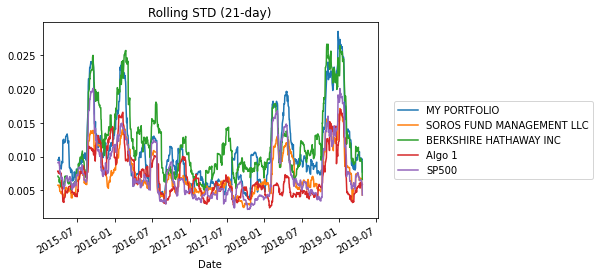

In [75]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
final_df.drop(columns=['PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC','Algo 2']).rolling(window=21).std().dropna().plot()
plt.legend(loc=[1.05,0.2])
plt.title('Rolling STD (21-day)');

### Calculate and plot the correlation

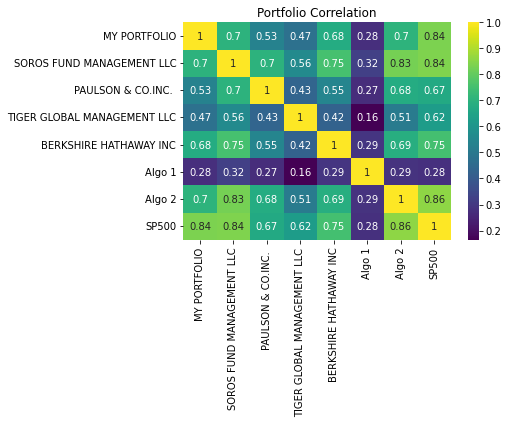

In [76]:
# Calculate and plot the correlation
sns.heatmap(final_df.corr(),cmap='viridis',annot=True)
plt.title('Portfolio Correlation');

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

My Portfolio Beta is: 1.155


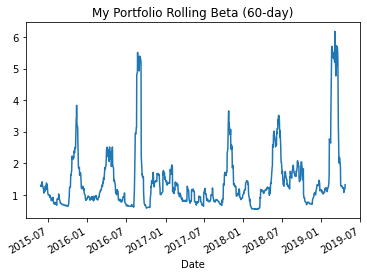

In [77]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
myport_covar = final_df['MY PORTFOLIO'].cov(final_df['SP500'])

# Calculate variance of S&P 500
sp500_var = final_df['SP500'].var()

# Computing beta
myport_beta = round(myport_covar/sp500_var, 3)
print(f'My Portfolio Beta is: {myport_beta}')

# Plot beta trend
(final_df['MY PORTFOLIO'].rolling(window=60).cov(final_df['SP500'])/final_df['SP500'].rolling(window=30).var()).plot()
plt.title('My Portfolio Rolling Beta (60-day)');

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [289]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (final_df.mean()*252) / (final_df.std()*np.sqrt(252))
sharpe_ratios

MY PORTFOLIO                   0.745003
SOROS FUND MANAGEMENT LLC     -0.345907
PAULSON & CO.INC.             -1.273125
TIGER GLOBAL MANAGEMENT LLC   -0.630067
BERKSHIRE HATHAWAY INC         0.192576
Algo 1                         0.650964
Algo 2                        -0.163336
SP500                          0.000000
dtype: float64

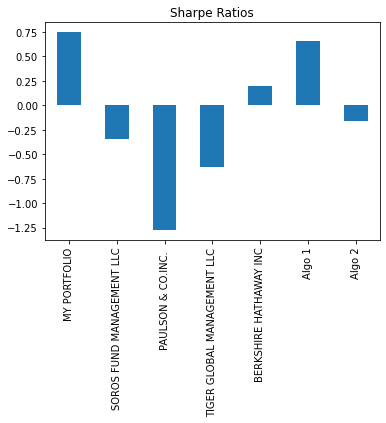

In [290]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.drop('SP500').plot(kind='bar')
plt.title('Sharpe Ratios');

### How does your portfolio do?

My portfolio did pretty well. The sharpe ratio was more positive than any of the provided portfolios which means it had a higher excess return than them. My portfolio did have a relatively high annual standard deviation compared to the rest of the portfolios meaning it was on the riskier side, although it was not the most risky.